In [1]:
import matplotlib.pyplot as plt
from torchvision.datasets.mnist import MNIST
from torchvision.transforms import ToTensor
from torch.utils.data.dataloader import DataLoader
import torch
import torch.nn as nn
from torch.optim.adam import Adam

In [2]:
# transform = ToTensor() : tensor로 바뀌어서 들어온다.
train_data = MNIST(root='./', train = True, download = True, transform = ToTensor())
test_data = MNIST(root = './', train = False, download = True, transform = ToTensor())

0it [00:00, ?it/s]

Extracting ./MNIST\raw\train-images-idx3-ubyte.gz to ./MNIST\raw


0it [00:00, ?it/s]

Extracting ./MNIST\raw\train-labels-idx1-ubyte.gz to ./MNIST\raw


0it [00:00, ?it/s]

Extracting ./MNIST\raw\t10k-images-idx3-ubyte.gz to ./MNIST\raw


0it [00:00, ?it/s]

Extracting ./MNIST\raw\t10k-labels-idx1-ubyte.gz to ./MNIST\raw
Processing...
Done!


C:\Users\user\miniconda3\envs\meta\lib\site-packages\torchvision\datasets\mnist.py:480: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [5]:
train_data.data.size()

torch.Size([60000, 28, 28])

In [8]:
train_data.targets

tensor([5, 0, 4,  ..., 5, 6, 8])

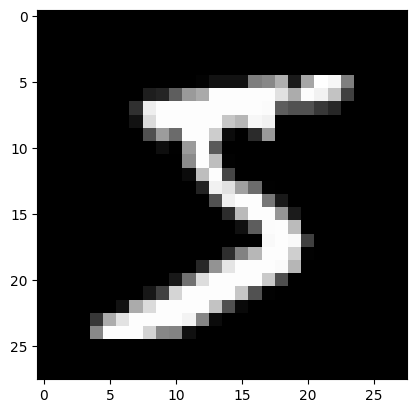

tensor(5)


In [12]:
plt.imshow(train_data.data[0], cmap = 'gray')
plt.show()
print(train_data.targets[0])

In [13]:
train_loader = DataLoader(train_data, batch_size = 32, shuffle = True)
test_loader = DataLoader(test_data, batch_size = 32, shuffle = False)


In [19]:
# 학습 데이터, 정답 데이터가 둘다 들어가 있는 것을 확인
next(iter(train_loader))

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.]]],
 
 
         [[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.]]],
 
 
         [[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.]]],
 
 
         ...,
 
 
         [[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ..

### torch는 gpu설정을 따로 해줘야한다.

In [21]:
# GPU를 쓸수 있는지 없는지 확인 하는 코드
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

### 모델 생성

In [22]:
model = nn.Sequential(
    nn.Linear(784, 64),
    nn.ReLU(),
    nn.Linear(64, 64),
    nn.ReLU(),
    nn.Linear(64, 10)
)

# GPU로 보내기
model.to(device)
model

Sequential(
  (0): Linear(in_features=784, out_features=64, bias=True)
  (1): ReLU()
  (2): Linear(in_features=64, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
)

In [26]:
next(model.parameters()).get_device()
# 0이면 gpu, -1이면 cpu?

0

In [31]:
lr = 1e-3
optim = Adam(model.parameters(), lr = lr)

for epoch in range(20):
    for data, label in train_loader:
        optim.zero_grad()
        #### 데이터가 tensor로 되어있기때문에 torch,reshape
        #### data의 shape이 [60000, 28, 28]로 되어 있기때문에 뒤에를 784로 바꿔줘야한다.
        data = torch.reshape(data, (-1, 784))
        pred = model(data.to(device))
        #### label이 현재 cpu에 있기때문에 trian과 같은 환경인 gpu에 올려준다.
        loss = nn.CrossEntropyLoss()(pred, label.to(device))
        loss.backward()
        optim.step()
    print(f'{epoch+1} loss : {loss.item()}')

1 loss : 0.23404274880886078
2 loss : 0.13673359155654907
3 loss : 0.03913560509681702
4 loss : 0.012041179463267326
5 loss : 0.11948175728321075
6 loss : 0.2640201151371002
7 loss : 0.005975023843348026
8 loss : 0.004072185140103102
9 loss : 0.00500153424218297
10 loss : 0.022104086354374886
11 loss : 0.02499113418161869
12 loss : 0.02365652285516262
13 loss : 0.039120834320783615
14 loss : 0.006203210912644863
15 loss : 0.0008517655078321695
16 loss : 0.10753979533910751
17 loss : 0.045857224613428116
18 loss : 0.0027466434985399246
19 loss : 0.05103325843811035
20 loss : 0.00046809614286758006


### 검증

In [35]:
model.eval() # 필요없는 기능을 off 시킨다. (dropout, batchnormal 노드)
## model.eval()의 반대는 model.train() 을 해주면 된다.

total_corr = 0
# auto_grad 는 torch에서 학습 시킬때 미분을 자동으로 해주는 것인데 검증할때는 no_grad로 미분을 꺼줘야한다.
with torch.no_grad():
    for data, label in test_loader:
        data = torch.reshape(data, (-1, 784)).to(device)
        pred = model(data)
        
        preds = pred.data.max(1)[1]
        
        corr = preds.eq(label.to(device)).sum().item()
        print(corr)
        
        total_corr += corr
        
    print(total_corr / len(test_data))
        

31
32
32
31
30
32
31
30
30
31
30
32
32
29
32
31
32
32
30
31
31
30
31
31
32
32
31
32
32
30
32
31
30
32
31
31
31
32
28
29
31
30
32
30
30
32
30
31
29
32
31
32
30
29
30
31
32
30
31
30
30
28
30
30
31
30
28
32
31
30
32
29
31
31
29
30
32
31
31
31
30
31
29
32
32
30
31
32
32
31
31
29
30
30
32
32
30
31
32
32
32
31
31
32
32
32
31
32
31
31
30
30
30
31
32
32
31
31
30
29
31
32
31
30
30
32
32
30
32
30
30
30
31
31
31
32
31
31
31
32
31
32
31
32
31
32
32
30
29
30
29
31
31
30
30
32
32
31
31
32
31
32
32
32
32
32
31
32
32
32
31
32
32
32
32
31
31
31
32
30
32
32
30
31
31
30
28
31
31
31
32
32
30
32
32
32
32
32
32
32
31
32
32
30
30
28
31
31
31
32
32
30
32
31
32
32
32
32
32
32
32
32
31
32
32
32
32
32
32
32
32
31
30
31
32
32
32
32
32
32
32
31
32
31
31
30
31
29
32
32
32
31
31
32
32
32
32
31
31
32
31
32
31
32
32
32
29
32
32
32
32
32
32
32
32
32
31
32
32
32
32
31
30
32
32
32
32
32
32
32
32
32
32
32
31
32
32
32
32
31
32
31
28
30
28
28
31
31
32
32
31
32
16
0.9734


In [ ]:
test = torch.tensor([[1,2,3],[1,3,2]])
test.size()

In [ ]:
test.max(1)[1]

### 모델 저장

In [36]:
torch.save(model, 'model.pth')

In [38]:
model_new = torch.load('model.pth')

In [ ]:
model_new